- Nguyễn Hoàng Hiệp
- email: hoanghiepuit97@gmail.com


# Task:
- Build/train a model of your choice and explain briefly what it predicts (input, output, interpretation)
- Submit a python file that shows how this model is exposed through an API
- Include some examples of testing the API methods


# Introduce Model
## Interpretation:
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

Supervised Learning with

## Input:
## Output:
## Data Attribute Information:
Y - Bankrupt?: Class label

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability


# Understanding data

In [ ]:
from timeit import default_timer as timer
import itertools

import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/1UY7PXnjwm3aeClojS5WvOpVenKQ0eBW1/view?usp=sharing
# File ID: 1UY7PXnjwm3aeClojS5WvOpVenKQ0eBW1
file_id = '1UY7PXnjwm3aeClojS5WvOpVenKQ0eBW1'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('company_bankruptcy_data.csv') # dowload file
# Load data to dataframe
data_raw = pd.read_csv('company_bankruptcy_data.csv')
data_raw.columns = [i.title().strip() for i in list(data_raw.columns)]

In [ ]:
# Check get data is success
data_raw.head()

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,Continuous Interest Rate (After Tax),Operating Expense Rate,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent Eps In The Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-Tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total Debt/Total Net Worth,Debt Ratio %,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability To Assets,Operating Funds To Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-Term Liability To Current Assets,Retained Earnings To Total Assets,Total Income/Total Expense,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working Capitcal Turnover Rate,Cash Turnover Rate,Cash Flow To Sales,Fixed Assets To Assets,Current Liability To Liability,Current Liability To Equity,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

# Function draw Figure


In [ ]:
def corrbargraph(data, x_value, y_value):
    '''
    Figure: Correlation Bar
    '''
    plt.figure(figsize=(15,8))
    for i in range(1,7):
        plt.subplot(2,3,i)
        sns.barplot(x = x_value, y = y_value[i-1],data = data)
    plt.tight_layout(pad=0.5)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
# Data size
data_raw.shape

(6819, 96)

In [ ]:
data_raw.describe()

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,Continuous Interest Rate (After Tax),Operating Expense Rate,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent Eps In The Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-Tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total Debt/Total Net Worth,Debt Ratio %,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability To Assets,Operating Funds To Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-Term Liability To Current Assets,Retained Earnings To Total Assets,Total Income/Total Expense,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working Capitcal Turnover Rate,Cash Turnover Rate,Cash Flow To Sales,Fixed Assets To Assets,Current Liability To Liability,Current Liability To Equity,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [ ]:
# Data type
data_raw.dtypes

Bankrupt?                                                    int64
Roa(C) Before Interest And Depreciation Before Interest    float64
Roa(A) Before Interest And % After Tax                     float64
Roa(B) Before Interest And Depreciation After Tax          float64
Operating Gross Margin                                     float64
                                                            ...   
Liability To Equity                                        float64
Degree Of Financial Leverage (Dfl)                         float64
Interest Coverage Ratio (Interest Expense To Ebit)         float64
Net Income Flag                                              int64
Equity To Liability                                        float64
Length: 96, dtype: object

In [ ]:
# Check exists data null
data_raw.isnull().sum().max()

0

**Perfect: Since there are no missing values**

# Data Visualization

0    6599
1     220
Name: Bankrupt?, dtype: int64
Total percentage of bankrupted companies is 3.2 %.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


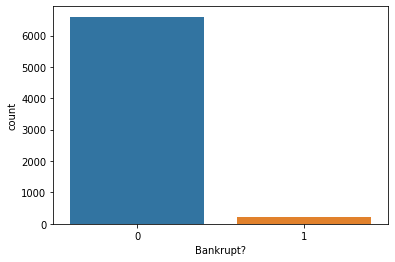

In [ ]:
print(data_raw["Bankrupt?"].value_counts())

percentage = data_raw["Bankrupt?"].value_counts()[1]/len(data_raw)
print("Total percentage of bankrupted companies is %.1f" %(percentage*100) + " %.")

sns.countplot(data_raw["Bankrupt?"])
plt.show()

There is a huge imbalance between the two categories. It turns out that only 3.2% companies in this dataset bankrupted.

=> The records are observed to be highly imbalanced.

=> should use **underspampling** or **OverSampling** to resolve.

The categorical data is distinguished as binary 1 and 0, thus stored as int64". We separate the numeric and categoric data to analyze our dataset.

In [ ]:
numeric_features = data_raw.dtypes[data_raw.dtypes != 'int64'].index
categorical_features = data_raw.dtypes[data_raw.dtypes == 'int64'].index

data_raw[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

Explore columns: 'Liability-Assets Flag'


0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


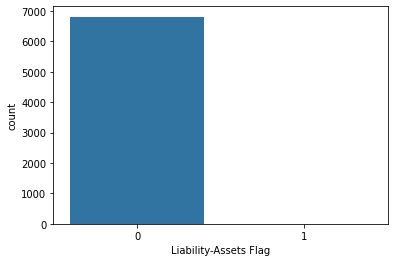

In [ ]:
print(data_raw["Liability-Assets Flag"].value_counts())
sns.countplot(data_raw["Liability-Assets Flag"])

*A majority number of times, organizations/company's assets are more than their liabilities.*

Explore columns: 'Net Income Flag'

1    6819
Name: Net Income Flag, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


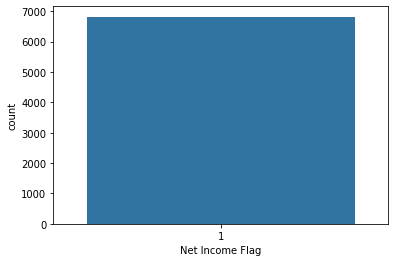

In [ ]:
print(data_raw["Net Income Flag"].value_counts())
sns.countplot(data_raw["Net Income Flag"])

Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
*=> We observe that all the records have been exhibiting a loss(Negative income) for the past two years.*

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


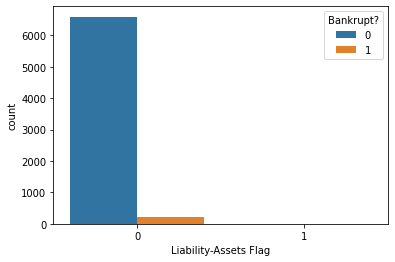

In [ ]:
print(data_raw[['Liability-Assets Flag', 'Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag', hue = 'Bankrupt?',data = data_raw)

Liability-Assets Flag  Net Income Flag  Bankrupt?
0                      1                0            6597
                                        1             214
1                      1                1               6
                                        0               2
dtype: int64


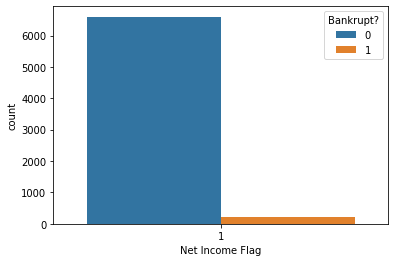

In [ ]:
print(data_raw[['Liability-Assets Flag', 'Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag', hue = 'Bankrupt?',data = data_raw)

*Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.*



In [ ]:
positive_corr = data_raw[numeric_features].corrwith(data_raw["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data_raw[numeric_features].corrwith(data_raw["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = data_raw[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data_raw[negative_corr + ["Bankrupt?"]].copy()

For simplicity: the six top positively and negatively correlated attributes.

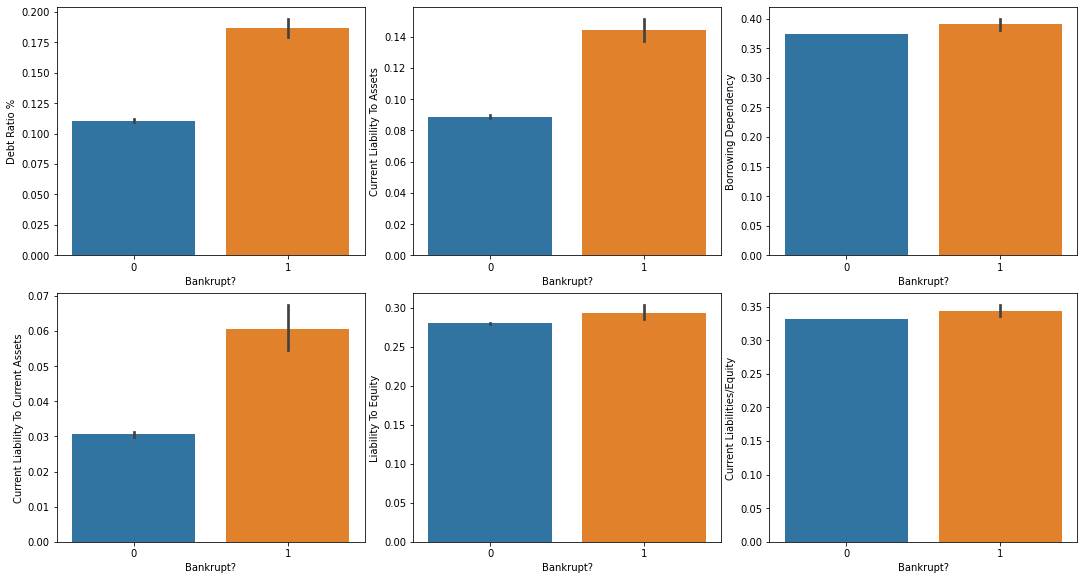

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(data_raw, x_value, y_value)

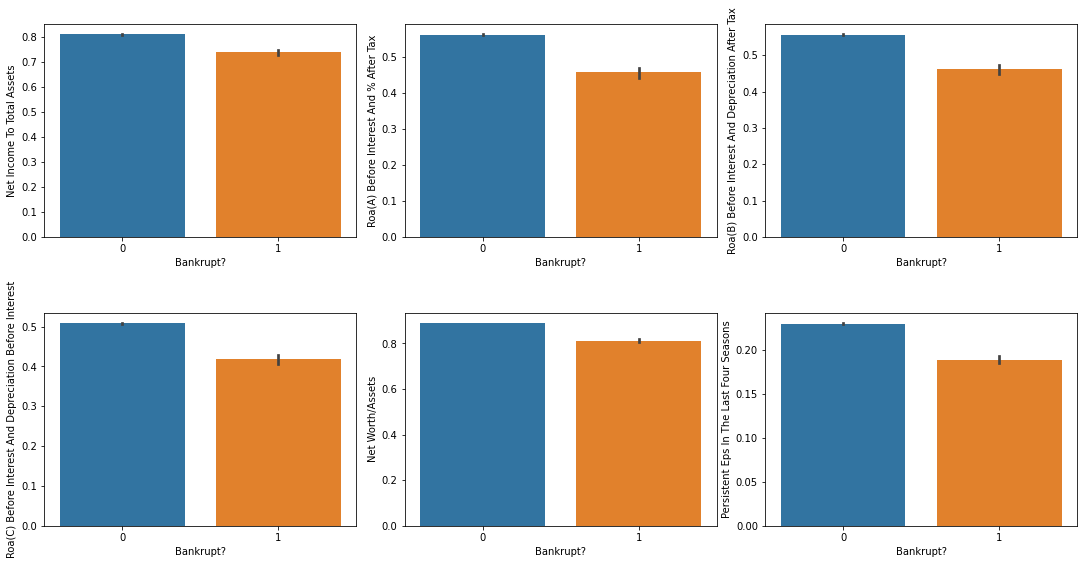

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(data_raw, x_value, y_value)

In [ ]:
attributes = [negative_corr.columns.tolist()[-1]] + negative_corr.columns.tolist()[:-1] + positive_corr.columns.tolist()[:-1]
print(attributes)

['Bankrupt?', 'Net Income To Total Assets', 'Roa(A) Before Interest And % After Tax', 'Roa(B) Before Interest And Depreciation After Tax', 'Roa(C) Before Interest And Depreciation Before Interest', 'Net Worth/Assets', 'Persistent Eps In The Last Four Seasons', 'Debt Ratio %', 'Current Liability To Assets', 'Borrowing Dependency', 'Current Liability To Current Assets', 'Liability To Equity', 'Current Liabilities/Equity']


=> List attributes have chosen:
['Bankrupt?', 'Net Income To Total Assets', 'Roa(A) Before Interest And % After Tax', 'Roa(B) Before Interest And Depreciation After Tax', 'Roa(C) Before Interest And Depreciation Before Interest', 'Net Worth/Assets', 'Persistent Eps In The Last Four Seasons', 'Debt Ratio %', 'Current Liability To Assets', 'Borrowing Dependency', 'Current Liability To Current Assets', 'Liability To Equity', 'Current Liabilities/Equity']


In [ ]:
data, data_test_via_api = data_raw[attributes], data_raw[attributes[1:]][:5]
data.shape

(6814, 13)

In [ ]:
# Save data test file at gg drive
from google.colab import drive
drive.mount('drive')
data_test_via_api.to_csv(
    '/content/drive/My Drive/Colab Notebooks/MTI/data/data_test_via_api.csv',
    index=False,)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


PCA is a way to decorrelate and reduce the dimensionality of the data through the change of the basis.

In [ ]:
#PCA
scaler = StandardScaler() 
data_for_pca = pd.DataFrame(data=scaler.fit_transform(data),index=data.index,columns=data.columns)

n_components = 10

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_for_pca)
data_pc = pd.DataFrame(data=principal_components, columns=['PC %d'%d for d in range(n_components)])

# Data Imbalance
There is a huge imbalance between the data (only 3.2% companies from the dataset bankrupted). Before training a model I need to deal with this problem, otherwise the model would just predict every company to not bankrupt.

**SMOTE** The Synthetic Minority Over-sampling TEchnique. \ Creates new synthetic datapoints using the k-nearest neighbor algorithm. \ With this method I am going to obtain the dataset where the value counts for both categories are the same.



In [ ]:
X, y = data[data.columns.tolist()[1:]], data[data.columns.tolist()[0]]

In [ ]:
#DATA IMBALANCE
#SMOTE 
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)
X_sm = pd.DataFrame(X_sm, columns=X.columns.tolist())
y_sm = pd.DataFrame(y_sm, columns=['Bankrupt?'])

print('New balance of 1 and 0 classes (%):')
y_sm.value_counts()

New balance of 1 and 0 classes (%):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Bankrupt?
1            6599
0            6599
dtype: int64

# Train Model:
Use Random Forest Classifier

## Training model

In [ ]:
# Ratio: train set 80%, test set 20%
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
# Model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []

accuracy_models = []
accuracy_test_set = []

f1_score_train = []
f1_score_test = []

K_Fold = 3
kf = KFold(n_splits=K_Fold)
kf.get_n_splits(X_train)

# Start time
start_ho = timer()
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    # Print the accuracy
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))

print('Accuracy rate on data train: ', accuracy_models)
print('Accuracy rate on data test: ', accuracy_test_set)
print('Average Accuracy rate on data train:', np.mean(accuracy_models))
print('Average Accuracy rate on data test:', np.mean(accuracy_test_set))
print('Average F1 score on data train:', np.mean(f1_score_train))
print('Average F1 score on data test:', np.mean(f1_score_test))
# Endtime
end_ho = timer()
# Total time running
time_diff = round((end_ho - start_ho), 2)
print('Total time: ', time_diff, ' second')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy rate on data train:  [95.76704545454545, 95.22591645353793, 96.61835748792271]
Accuracy rate on data test:  [95.83333333333334, 95.11363636363637, 95.83333333333334]
Average Accuracy rate on data train: 95.8704397986687
Average Accuracy rate on data test: 95.59343434343435
Average F1 score on data train: 0.9594943012213082
Average F1 score on data test: 0.9563167062058415
Total time:  2.85  second


Confusion matrix, without normalization
[[1250   83]
 [  32 1273]]


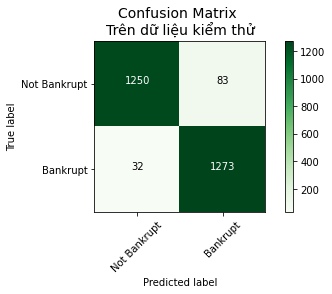

In [ ]:
# Confusion matrix: data test
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Not Bankrupt', 'Bankrupt']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)



*   2%(32/(32+1273)) company is Bankrupt but have predict Not Bankrupt
*   6% company is Not Bankrupt but have predict Bankrupt



## Saving and loading model

In [ ]:
import pickle

In [ ]:
# Save model with name bankrupt_model
bankrupt_model = "bankrupt_model.pkl"
with open(bankrupt_model, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load model
try:
    with open(bankrupt_model, 'rb') as file:
        bankrupt_model = pickle.load(file)
except:
    print('Cannot find the bankrupt model!')

In [ ]:
mock_data_test = []

In [ ]:
# Test model
Ypredict = bankrupt_model.predict(X_test_via_api)
print(Ypredict)

[0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 

# Need improve:


1.   Try more model and find the best accuracy
2.   Try more parameters (Kfold, n_estimators, random_state, data train size,...)
2.   Save only best accuracy model


